In [1]:
%matplotlib ipympl
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path
import matplotlib.animation as animation

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


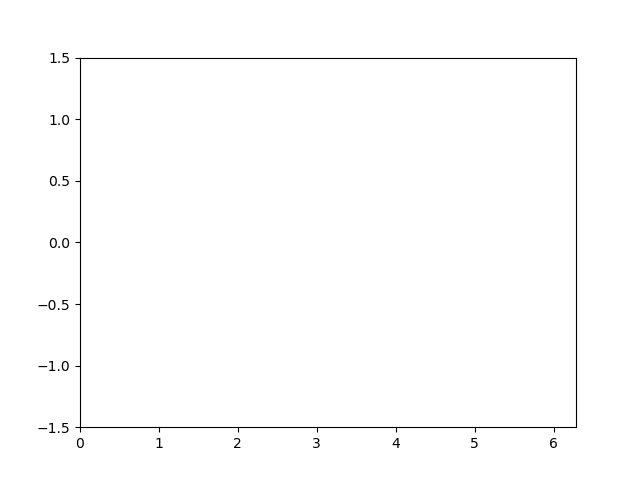

In [2]:
#fig, ax = plt.subplots()
x = np.linspace(0, 2 * np.pi, 100) 
ya = np.cos(x)
yb = np.sin(x)

def animate(i): 
    la.set_data(x[:i],ya[:i]) 
    lb.set_data(x[:i],yb[:i])
    return (la,lb)
    
plt.xlim(0,2*np.pi) 
plt.ylim(-1.5,1.5)
la, = plt.plot([], [], "b-") 
lb, = plt.plot([], [], "r--")
ani = animation.FuncAnimation(plt.gcf(), animate, 100, repeat=True, blit=True,interval=1)
plt.show()

In [3]:
#Radii of all planets in Astronomical Units:
rMer = 0.387                # Radius of Mercury in AU
rVen = 0.723                # Radius of Venus in AU
rEar = 1.00                 # Radius of Earth in AU
rMar = 1.524                # Radius of Mars in AU
rJup = 5.203                # Radius of Jupiter in AU
rSat = 9.537                # Radius of Saturn in AU
rUra = 19.191               # Radius of Uranus in AU
rNep = 30.069               # Radius of Neptune in AU

In [4]:
def verlet(dt,xn,yn,xnm1,ynm1,axn,ayn): 
    txnm1 = xn
    tynm1 = yn
    xn = 2*xn -xnm1 + dt**2 * axn 
    yn = 2*yn -ynm1 + dt**2 * ayn 
    return xn,yn,txnm1,tynm1

1.0
2.4
3.65
6.87


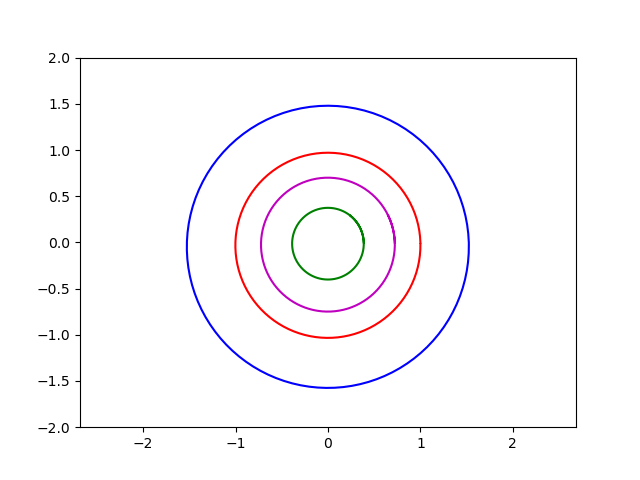

In [5]:
def planet(rad = rEar,period=365):
    mu = 4 * np.pi**2
    vz = np.sqrt(mu/rad) 
    dt = 1/100 * (period/365)
    print(period/100.)
    xn = rad
    yn = 0
    xnm1 = rad
    ynm1 = -vz*dt

    az = mu
    tx = np.array([]) 
    ty = np.array([])
    for i in range(int(101)):
        tx = np.append(tx,xn)
        ty = np.append(ty,yn)
        axn = -az*xn/np.sqrt(xn**2+yn**2)**3
        ayn = -az*yn/np.sqrt(xn**2+yn**2)**3 
        xn,yn,xnm1,ynm1 = verlet(dt,xn,yn,xnm1,ynm1,axn,ayn)
    return tx,ty

xMer,yMer = planet(rad = rMer,period=100)
xVen,yVen = planet(rad = rVen,period=240)
xEar,yEar = planet(rad = rEar,period=365)
xMar,yMar = planet(rad = rMar,period=687)

fig2, ax = plt.subplots()

plt.axis('equal')
plt.xlim(-2,2) 
plt.ylim(-2,2) 
plt.plot(xEar,yEar,'-r')
plt.plot(xMar,yMar,'-b')
plt.plot(xMer,yMer,'-g')
plt.plot(xVen,yVen,'-m')
#plt.plot(tx[0],ty[0],'xb')
#plt.plot(tx[-1],ty[-1],'xr')

In [6]:
print(np.sqrt((rMer**3)/(rMar**3)))
print(np.sqrt((rVen**3)/(rMar**3)))
print(np.sqrt((rEar**3)/(rMar**3)))
print(np.sqrt((rMar**3)/(rMar**3)))
print(365/100.)


0.12796435059567213
0.3267608336889232
0.5315235966275709
1.0
3.65


In [7]:
#----------INNER PLANETS (Mercury-->Mars)----------#         
 
#Set parameters:
N = 687                     # Mars days in a year
dt = 2/N                 # Time Step: Fractions of a year - 1 Mars day (i.e. 1/687)
mu = 4 * np.pi**2

In [8]:
#-----EARTH-----#
 
#Create an array, for all variables, of size N with all entries equal to zero:
xEar = np.zeros((N,))
yEar = np.zeros((N,))
vxEar = np.zeros((N,))
vyEar = np.zeros((N,))
 
# Initial Conditions:
xEar[0] = rEar                   # (x0 = r, y0 = 0) in AU
vyEar[0] = np.sqrt(mu/rEar)      # (vx0 = 0, v_y0 = sqrt(mu/r)) AU/yr
 
#Implement Verlet Algorithm:
for k in range(0,N-1):
    vxEar[k+1] = vxEar[k] - (mu*xEar[k]) / (rEar**3)*dt
    xEar [k+1] = xEar[k] + vxEar[k+1]*dt
    vyEar[k+1] = vyEar[k] - (mu*yEar[k]) / (rEar**3)*dt
    yEar [k+1] = yEar[k] + vyEar[k+1]*dt

#-----MERCURY-----#
 
#Create an array, for all variables, of size N with all entries equal to zero:
xMer = np.zeros((N,))
yMer = np.zeros((N,))
vxMer = np.zeros((N,))
vyMer = np.zeros((N,))
 
# Initial Conditions:
xMer[0] = rMer                   # (x0 = r, y0 = 0) in AU
vyMer[0] = np.sqrt(mu/rMer)      # (v_x0 = 0, v_y0 = sqrt(mu/r)) AU/yr
 
#Implement Verlet Algorithm:
for k in range(0,N-1):
    vxMer[k+1] = vxMer[k] - (mu*xMer[k]) / (rMer**3)*dt
    xMer[k+1] = xMer[k] + vxMer[k+1]*dt
    vyMer[k+1] = vyMer[k] - (mu*yMer[k]) / (rMer**3)*dt
    yMer[k+1] = yMer[k] + vyMer[k+1]*dt

#-----VENUS-----#
 
#Create an array, for all variables, of size N with all entries equal to zero:
xVen = np.zeros((N,))
yVen = np.zeros((N,))
vxVen = np.zeros((N,))
vyVen = np.zeros((N,))
 
# Initial Conditions:
xVen[0] = rVen                   # (x0 = r, y0 = 0) in AU
vyVen[0] = np.sqrt(mu/rVen)      # (vx0 = 0, vy0 = sqrt(mu/r)) AU/yr
 
#Implement Verlet Algorithm:
for k in range(0,N-1):
    vxVen[k+1] = vxVen[k] - (mu*xVen[k]) / (rVen**3)*dt
    xVen[k+1] = xVen[k] + vxVen[k+1]*dt
    vyVen[k+1] = vyVen[k] - (mu*yVen[k]) / (rVen**3)*dt
    yVen[k+1] = yVen[k] + vyVen[k+1]*dt    
    
#-----MARS-----#
 
#Create an array, for all variables, of size N with all entries equal to zero:
xMar = np.zeros((N,))
yMar = np.zeros((N,))
vxMar = np.zeros((N,))
vyMar = np.zeros((N,))
 
# Initial Conditions:
xMar[0] = rMar                   # (x0 = r, y0 = 0) in AU
vyMar[0] = np.sqrt(mu/rMar)      # (vx0 = 0, vy0 = sqrt(mu/r)) AU/yr
 
#Implement Verlet Algorithm:
for k in range(0,N-1):
    vxMar[k+1] = vxMar[k] - (mu*xMar[k]) / (rMar**3)*dt
    xMar[k+1] = xMar[k] + vxMar[k+1]*dt
    vyMar[k+1] = vyMar[k] - (mu*yMar[k]) / (rMar**3)*dt
    yMar[k+1] = yMar[k] + vyMar[k+1]*dt
         

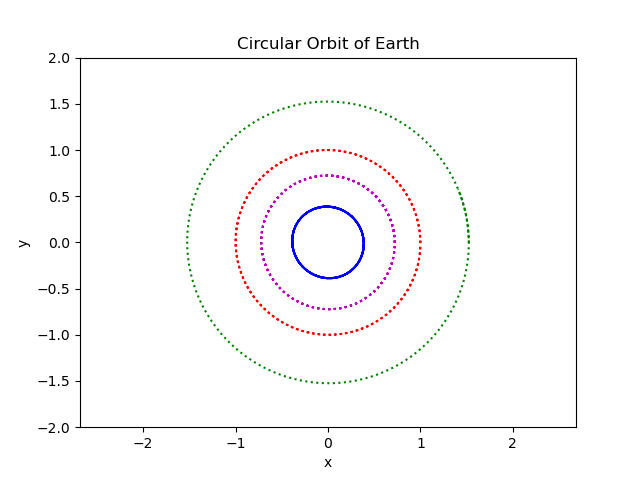

In [9]:
fig2, ax = plt.subplots()
plt.clf()
plt.title ('Circular Orbit of Earth')
plt.xlabel ('x')
plt.ylabel ('y')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.axis('equal')

#Plot:
plt.plot(xEar, yEar, "r:")
plt.plot(xMer, yMer, "b:")
plt.plot(xMar, yMar, "g:")
plt.plot(xVen, yVen, "m:")

lE, = plt.plot([], [], "rD")
lM, = plt.plot([], [], "bD")
lV, = plt.plot([], [], "mp")
lMA, = plt.plot([], [], "gp")

def animate1(i): 
    lE.set_data(xEar[i-1:i],yEar[i-1:i])
    lM.set_data(xMer[i-1:i],yMer[i-1:i])
    lV.set_data(xVen[i-1:i],yVen[i-1:i])
    lMA.set_data(xMar[i-1:i],yMar[i-1:i])
    return (lE,lM,lV,lMA)

ani = animation.FuncAnimation(fig2, animate1, 750, repeat=True, blit=True,interval=10)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.show()